In [71]:
import numpy as np
import pandas as pd
import plotly
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [25]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [26]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [27]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [28]:
df.shape

(100000, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


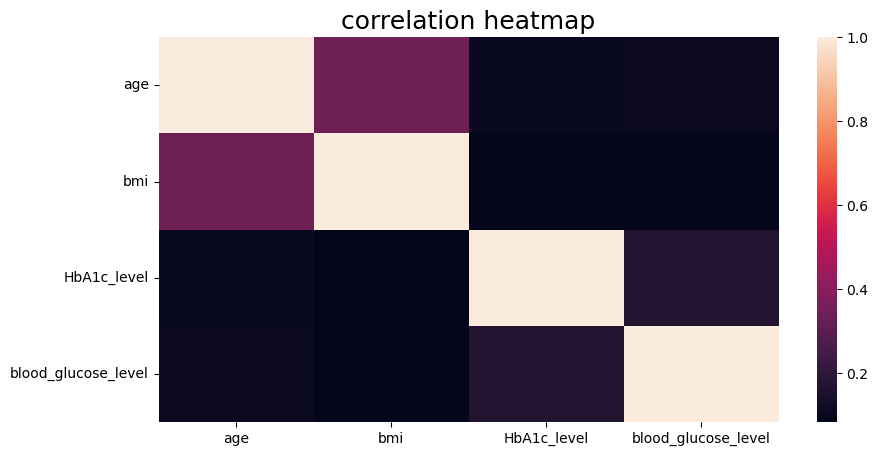

In [30]:

plt.figure(figsize=(10,5))
correlation= df[['age','bmi', 'HbA1c_level', 'blood_glucose_level']].corr()
sns.heatmap(correlation)
plt.title('correlation heatmap', fontsize=18)
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

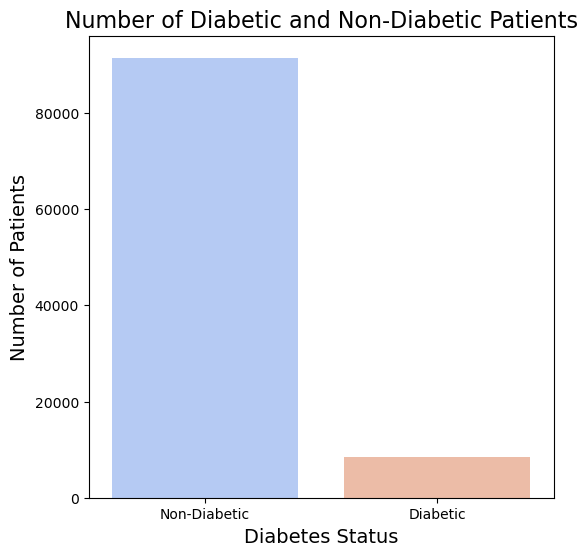

In [31]:
diabetes_counts = df['diabetes'].value_counts()

plt.figure(figsize=(6, 6)) 
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values, palette='coolwarm')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic']) 
plt.title('Number of Diabetic and Non-Diabetic Patients', fontsize=16)
plt.xlabel('Diabetes Status', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.show

In [32]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [33]:
diabetes_gender_counts = df.groupby(['gender', 'diabetes']).size().unstack(fill_value=0)


In [34]:
diabetes_gender_counts

diabetes,0,1
gender,,
Female,54091,4461
Male,37391,4039
Other,18,0


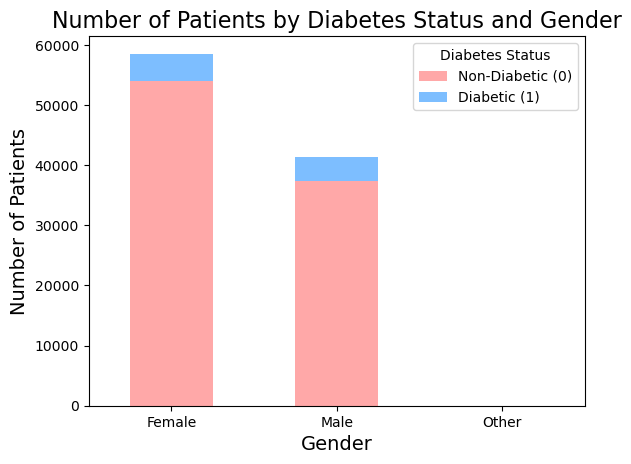

In [199]:
diabetes_gender_counts = df.groupby(['gender', 'diabetes']).size().unstack(fill_value=0)

diabetes_gender_counts.plot(kind='bar', stacked=True, color=['#FF9999', '#66B3FF'], alpha=0.85)
plt.title('Number of Patients by Diabetes Status and Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(rotation=0)  
plt.legend(title='Diabetes Status', labels=['Non-Diabetic (0)', 'Diabetic (1)'])

plt.show()

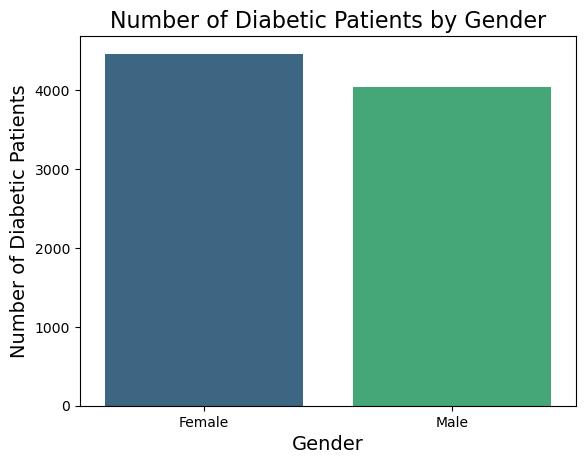

In [195]:
diabetic_patients = df[df['diabetes'] == 1]
diabetic_gender_counts = diabetic_patients['gender'].value_counts()
sns.barplot(x=diabetic_gender_counts.index, y=diabetic_gender_counts.values, palette='viridis')
plt.title('Number of Diabetic Patients by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Diabetic Patients', fontsize=14)

plt.show()

In [37]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

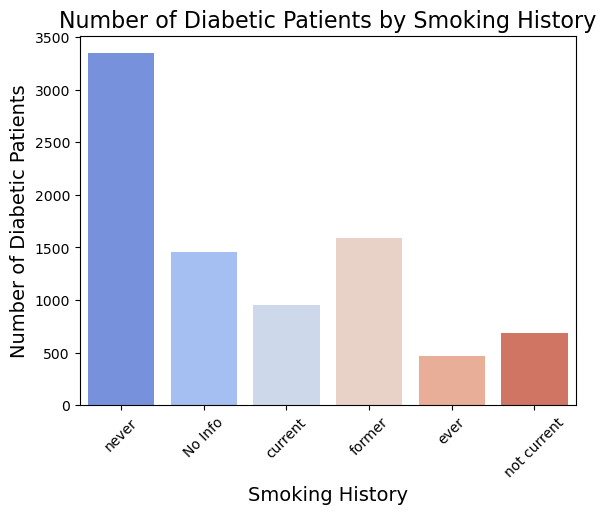

In [187]:
diabetic_patients = df[df['diabetes'] == 1]
smoking_history_counts = diabetic_patients['smoking_history'].value_counts()
smoking_categories = ['never', 'No Info', 'current', 'former', 'ever', 'not current']
sns.barplot(x=smoking_history_counts.reindex(smoking_categories).index, 
            y=smoking_history_counts.reindex(smoking_categories).values, 
            palette='coolwarm')
plt.title('Number of Diabetic Patients by Smoking History', fontsize=16)
plt.xlabel('Smoking History', fontsize=14)
plt.ylabel('Number of Diabetic Patients', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [39]:
# Count occurrences of each unique value in 'smoking_history'
smoking_history_counts = df['smoking_history'].value_counts()

# Display the counts
print("Counts of each unique smoking history value:")
print(smoking_history_counts)


Counts of each unique smoking history value:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


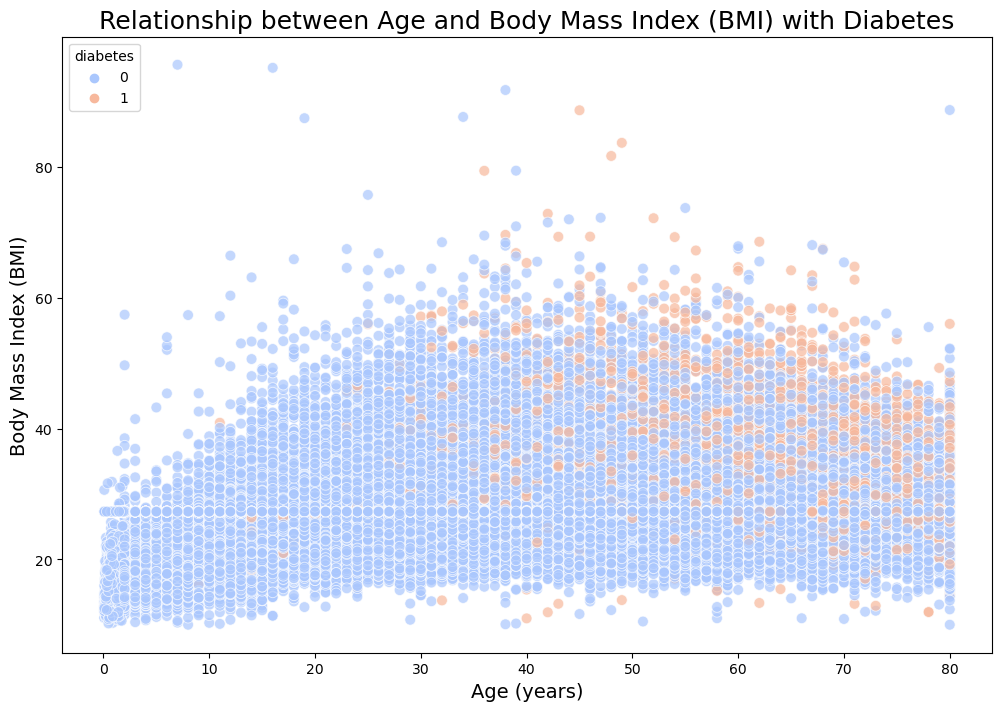

In [40]:
# 3. Scatter Plot - Age vs. BMI with Diabetes as Hue
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df, palette='coolwarm', s=60, alpha=0.7)
plt.title('Relationship between Age and Body Mass Index (BMI) with Diabetes', fontsize=18)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Body Mass Index (BMI)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.grid(False)
plt.show()

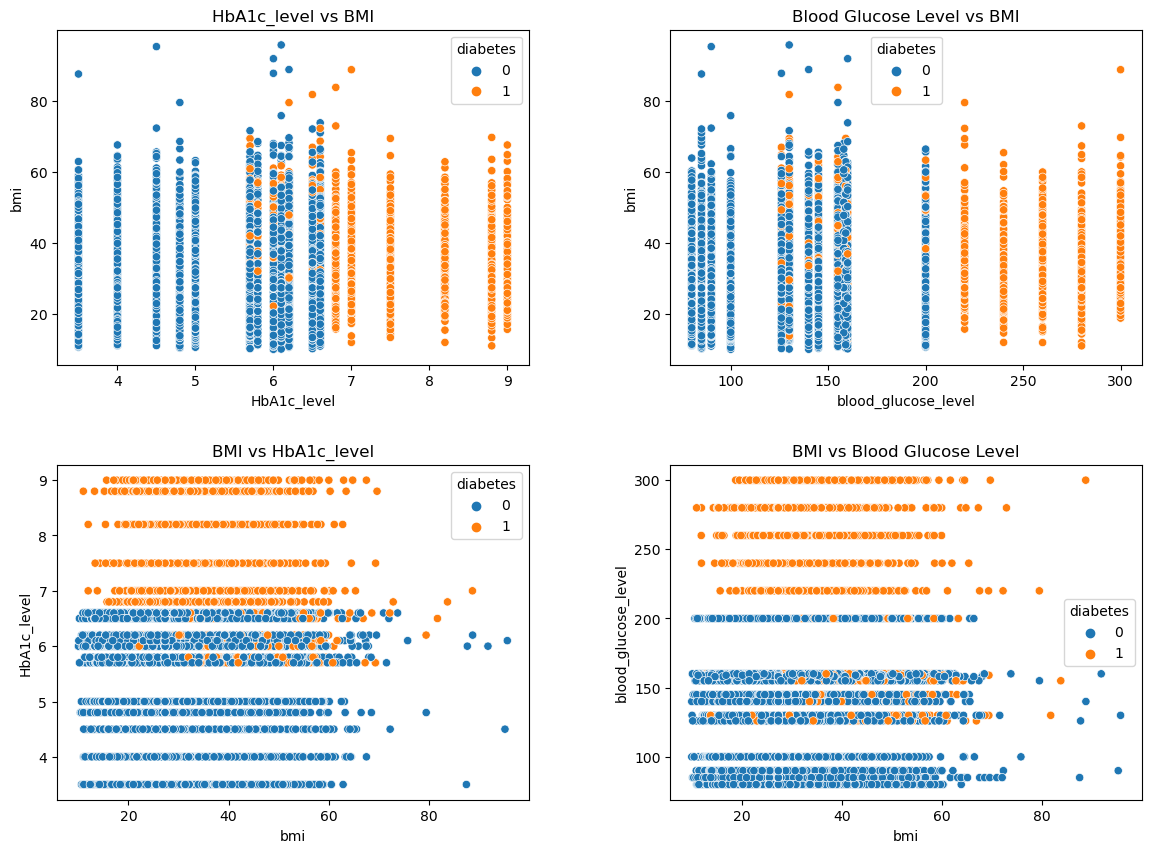

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Plot 1: HbA1c_level vs BMI
sns.scatterplot(x="HbA1c_level", y="bmi", data=df, hue="diabetes", ax=axes[0, 0])
axes[0, 0].set_title("HbA1c_level vs BMI")

# Plot 2: Blood Glucose Level vs BMI
sns.scatterplot(x="blood_glucose_level", y="bmi", data=df, hue="diabetes", ax=axes[0, 1])
axes[0, 1].set_title("Blood Glucose Level vs BMI")

# Plot 3: BMI vs HbA1c_level
sns.scatterplot(x="bmi", y="HbA1c_level", data=df, hue="diabetes", ax=axes[1, 0])
axes[1, 0].set_title("BMI vs HbA1c_level")

# Plot 4: BMI vs Blood Glucose Level
sns.scatterplot(x="bmi", y="blood_glucose_level", data=df, hue="diabetes", ax=axes[1, 1])
axes[1, 1].set_title("BMI vs Blood Glucose Level")

# Show the plots
plt.show()


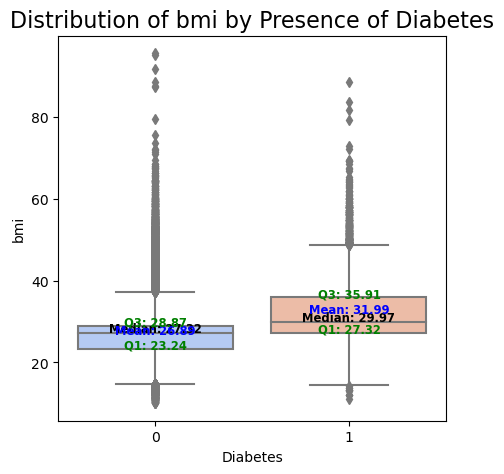

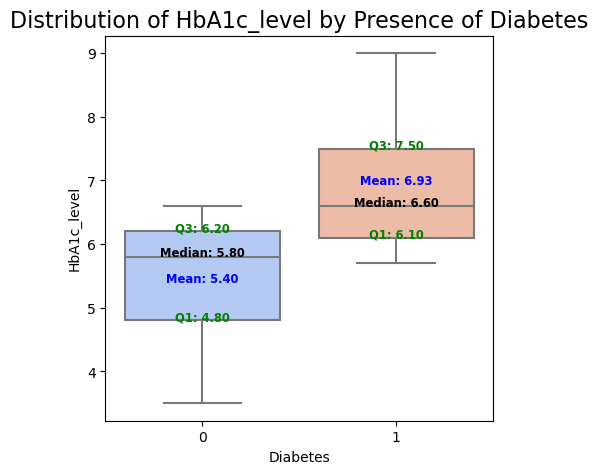

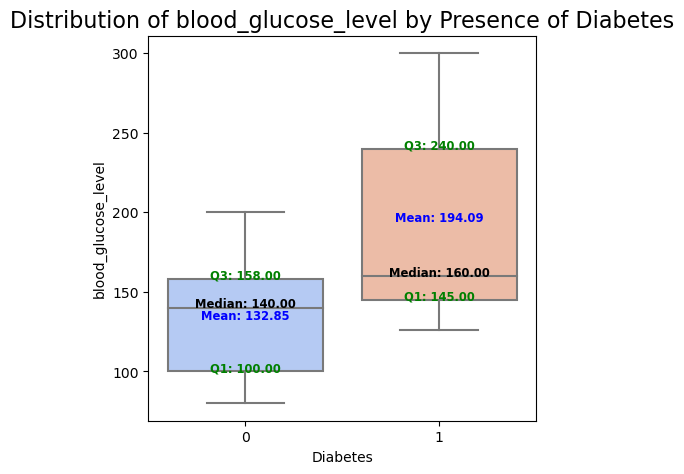

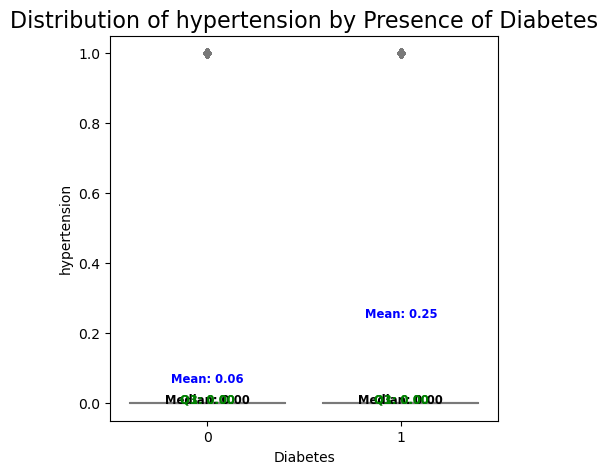

In [42]:
# 1. Boxplots for Numeric Variables by Diabetes
numeric_variables = ['bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension']

for var in numeric_variables:
    plt.figure(figsize=(5, 5))
    ax = sns.boxplot(x='diabetes', y=var, data=df, palette='coolwarm')
    plt.title(f'Distribution of {var} by Presence of Diabetes', fontsize=16)
    plt.xlabel('Diabetes')
    plt.ylabel(var)
    plt.grid(False)
    
    # Add statistics to the plot
    stats = df.groupby('diabetes')[var].describe()
    medians = stats['50%']
    means = stats['mean']
    q1 = stats['25%']
    q3 = stats['75%']
    
    for xtick in ax.get_xticks():
        ax.text(xtick, medians[xtick], f'Median: {medians[xtick]:.2f}', 
                horizontalalignment='center', size='small', color='black', weight='semibold')
        ax.text(xtick, means[xtick], f'Mean: {means[xtick]:.2f}', 
                horizontalalignment='center', size='small', color='blue', weight='semibold')
        ax.text(xtick, q1[xtick], f'Q1: {q1[xtick]:.2f}', 
                horizontalalignment='center', size='small', color='green', weight='semibold')
        ax.text(xtick, q3[xtick], f'Q3: {q3[xtick]:.2f}', 
                horizontalalignment='center', size='small', color='green', weight='semibold')
    
    plt.show()

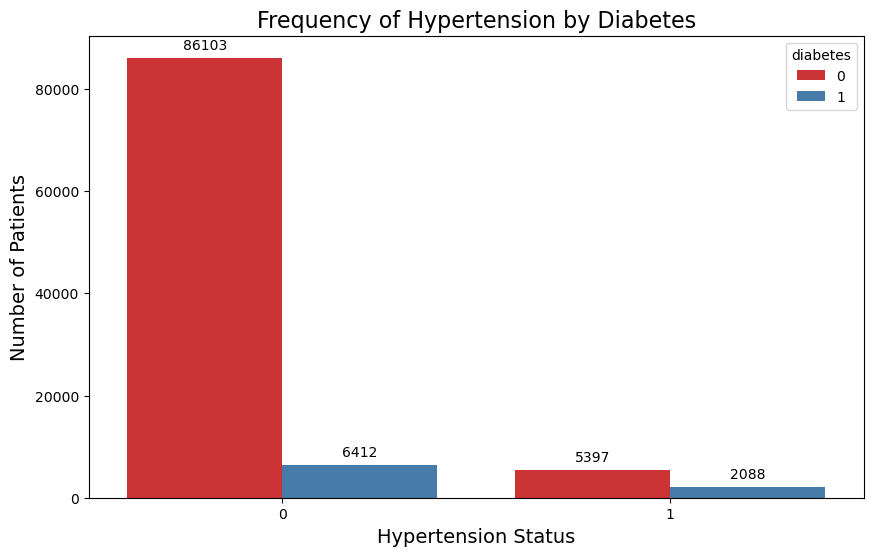

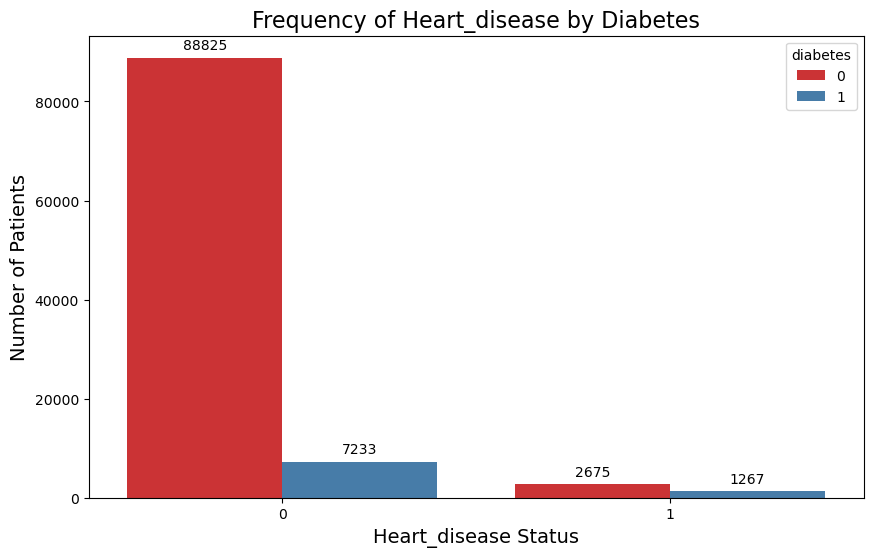

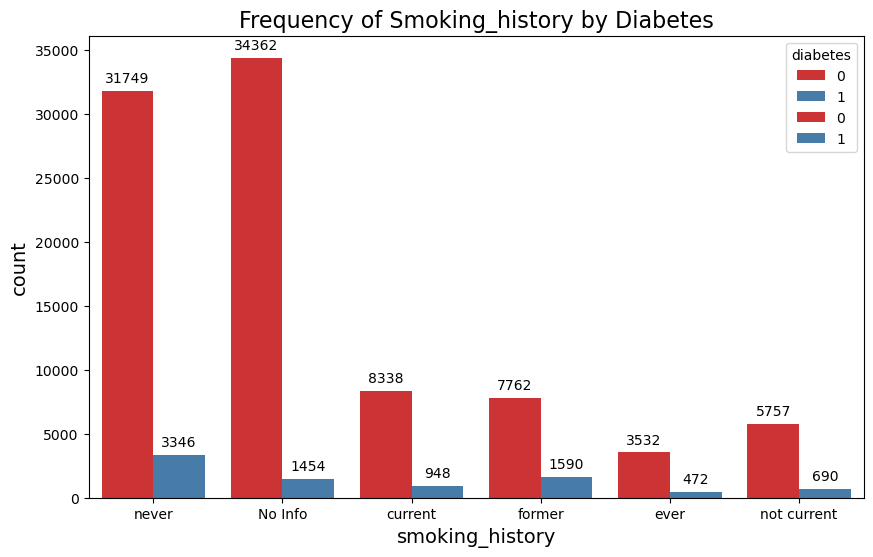

In [43]:
# 3. Bar Plot for Category Frequency
categories = ['hypertension', 'heart_disease', 'smoking_history']

for cat in categories:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=cat, hue='diabetes', data=df, palette='Set1')
    plt.title(f'Frequency of {cat.capitalize()} by Diabetes', fontsize=16)
    plt.xlabel(f'{cat.capitalize()} Status', fontsize=14)
    plt.ylabel('Number of Patients', fontsize=14)
    
    # Add absolute values on the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize=10)
    
    # Reorder categories for smoking_history (if applicable)
    if cat == 'smoking_history':
        order = ['never', 'No Info', 'current', 'former', 'ever', 'not current']
        sns.countplot(x=cat, hue='diabetes', data=df, palette='Set1', order=order)
    
    plt.grid(False)
    plt.show()

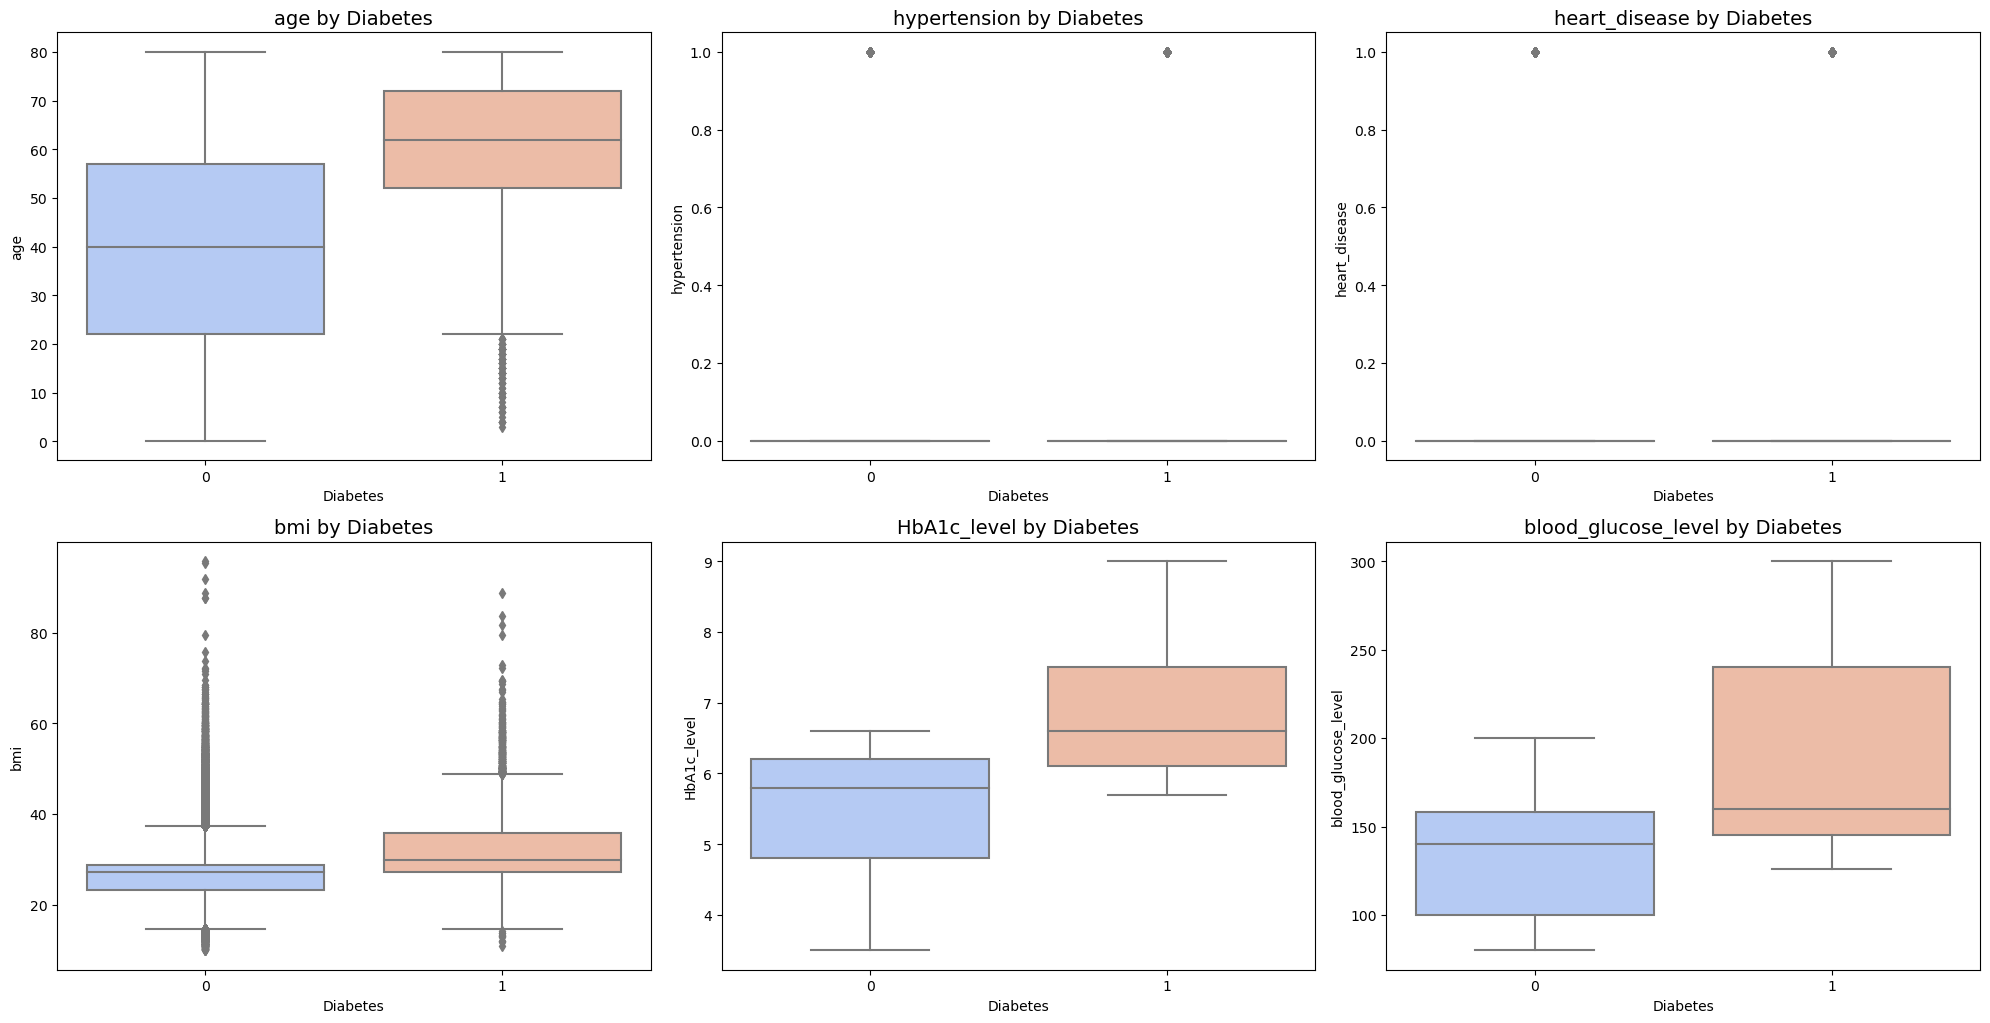

In [69]:
# Checking for blank data
blank_data = df.isnull().sum()
print("Blank data by column:")
print(blank_data)

Blank data by column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [95]:
label_encoder = LabelEncoder()
df['Gender_Encoded'] = label_encoder.fit_transform(df['gender'])
print(df['Gender_Encoded'].unique())

[0 1 2]


In [97]:
print(df)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  Gender_Encoded  
0              6.6             

In [101]:
df.drop('gender', axis=1)

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Gender_Encoded
0,80.0,0,1,never,25.19,6.6,140,0,0
1,54.0,0,0,No Info,27.32,6.6,80,0,0
2,28.0,0,0,never,27.32,5.7,158,0,1
3,36.0,0,0,current,23.45,5.0,155,0,0
4,76.0,1,1,current,20.14,4.8,155,0,1
...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,No Info,27.32,6.2,90,0,0
99996,2.0,0,0,No Info,17.37,6.5,100,0,0
99997,66.0,0,0,former,27.83,5.7,155,0,1
99998,24.0,0,0,never,35.42,4.0,100,0,0


In [103]:
df.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [105]:
df['smoking_history_encoded'] = label_encoder.fit_transform(df['smoking_history'])
print(df['smoking_history_encoded'].unique())

[4 0 1 3 2 5]


In [149]:
mode_value = df['smoking_history_encoded'].mode()
print(print(len(df.loc[df['smoking_history_encoded'] == 0])))


35816
None


In [151]:
from sklearn.impute import KNNImputer

df['smoking_history_encoded'].replace(0, np.nan, inplace=True)

imputer = KNNImputer(n_neighbors=5)
df[['smoking_history_encoded']] = imputer.fit_transform(df[['smoking_history_encoded']])


In [191]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Gender_Encoded,smoking_history_encoded
0,Female,80.0,0,1,never,25.19,6.6,140,0,0,4.00000
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,3.39594
2,Male,28.0,0,0,never,27.32,5.7,158,0,1,4.00000
3,Female,36.0,0,0,current,23.45,5.0,155,0,0,1.00000
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,1.00000


In [159]:
cleaned_df= df.drop(['gender', 'smoking_history'], axis=1)

In [163]:
cleaned_df.head(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Gender_Encoded,smoking_history_encoded
0,80.0,0,1,25.19,6.6,140,0,0,4.00000
1,54.0,0,0,27.32,6.6,80,0,0,3.39594
2,28.0,0,0,27.32,5.7,158,0,1,4.00000
3,36.0,0,0,23.45,5.0,155,0,0,1.00000
4,76.0,1,1,20.14,4.8,155,0,1,1.00000
5,20.0,0,0,27.32,6.6,85,0,0,4.00000
6,44.0,0,0,19.31,6.5,200,1,0,4.00000
7,79.0,0,0,23.86,5.7,85,0,0,3.39594
8,42.0,0,0,33.64,4.8,145,0,1,4.00000
9,32.0,0,0,27.32,5.0,100,0,0,4.00000


In [167]:
X = cleaned_df.drop("diabetes", axis=1)
y= cleaned_df.diabetes

In [169]:
X.shape

(100000, 8)

In [171]:
y.shape

(100000,)

In [173]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize training data
print("Rows and columns of training data X_train:", X_train.shape)
print("Rows and columns of training data y_train:", X_train.shape)

Rows and columns of training data X_train: (80000, 8)
Rows and columns of training data y_train: (80000, 8)


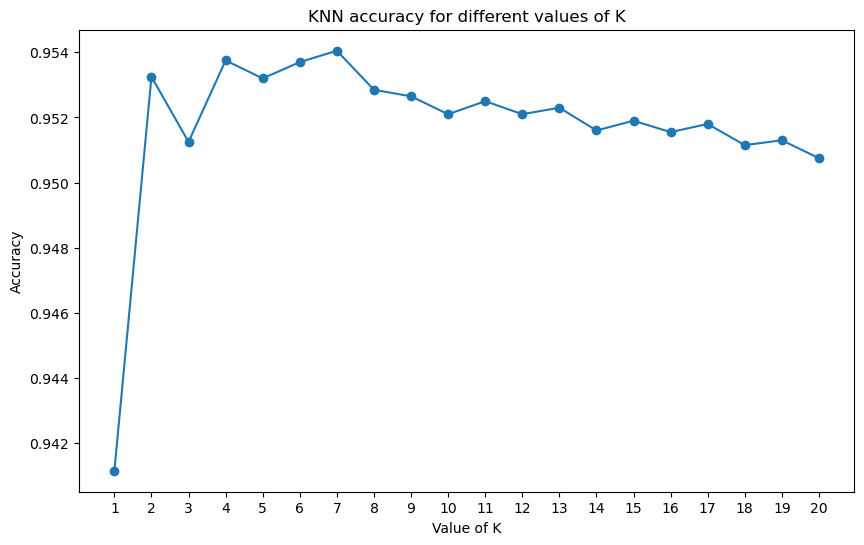

Best value of K: 7
Corresponding accuracy: 0.95405


In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

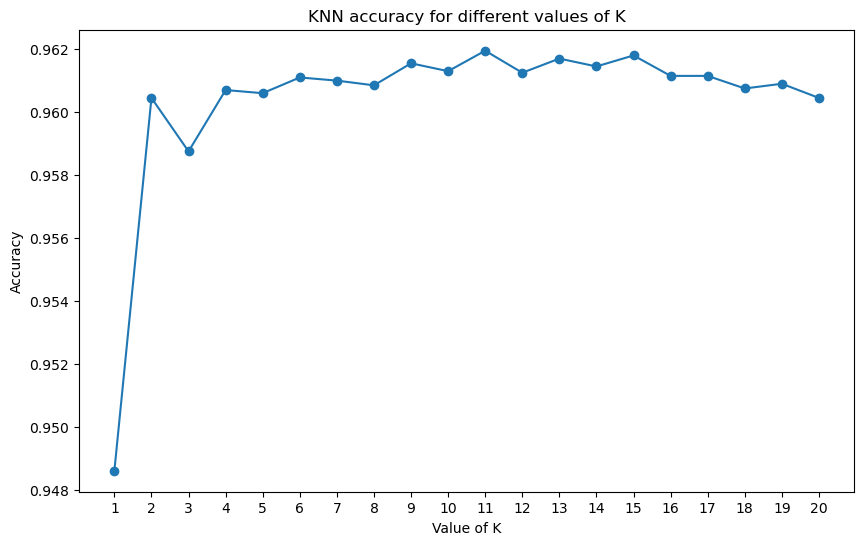

Best value of K: 11
Corresponding accuracy: 0.96195


In [181]:
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

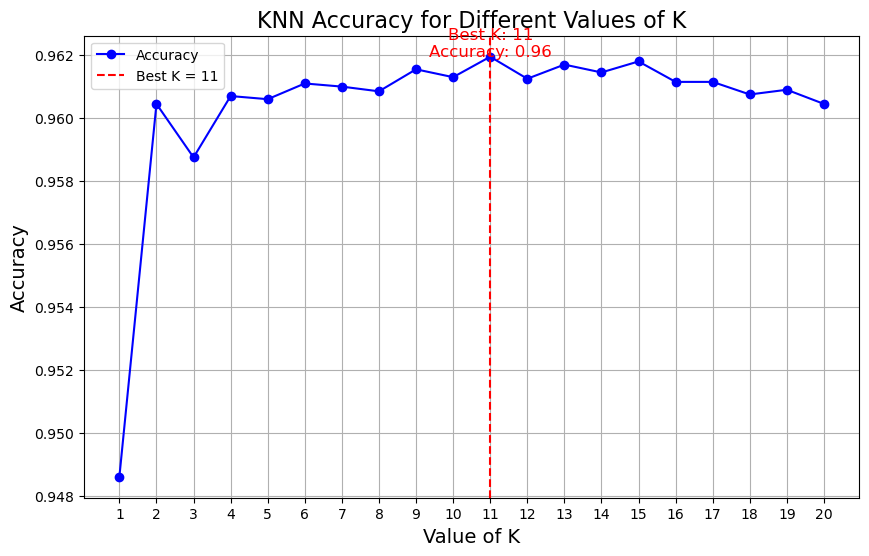

In [201]:
from sklearn.metrics import confusion_matrix, roc_curve, auc


# 1. Accuracy vs. K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.title('KNN Accuracy for Different Values of K', fontsize=16)
plt.xlabel('Value of K', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(k_values)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best K = {best_k}')
plt.text(best_k, best_accuracy, f'Best K: {best_k}\nAccuracy: {best_accuracy:.2f}', color='red', fontsize=12, ha='center')
plt.legend()
plt.grid(True)
plt.show()

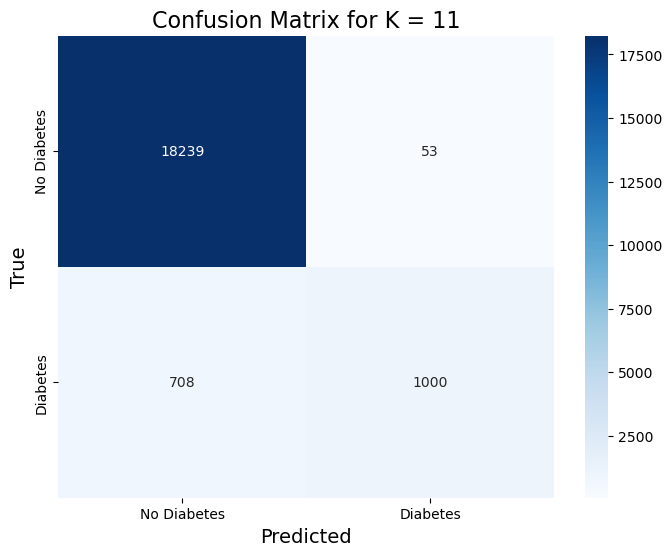

In [203]:
# 2. Confusion Matrix for the best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix for K = {best_k}', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.show()

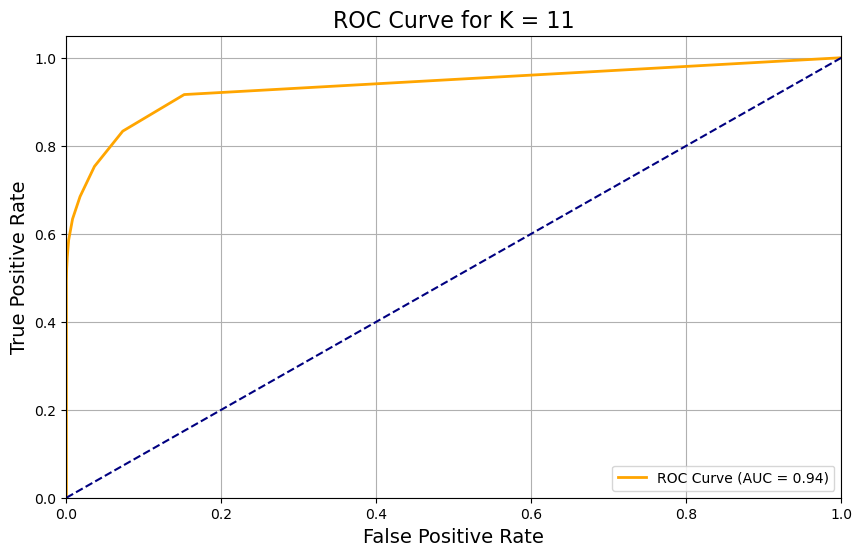

In [204]:
# 3. ROC Curve for the best K
y_prob = best_knn.predict_proba(X_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title(f'ROC Curve for K = {best_k}', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

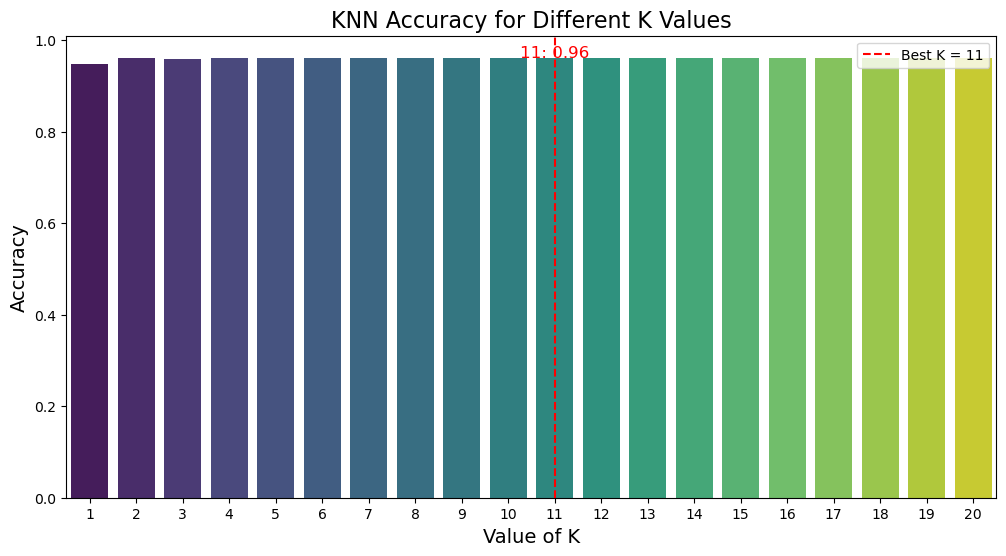

In [207]:
# 4. Bar chart of accuracies
plt.figure(figsize=(12, 6))
sns.barplot(x=list(k_values), y=accuracies, palette='viridis')
plt.title('KNN Accuracy for Different K Values', fontsize=16)
plt.xlabel('Value of K', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.axvline(x=k_values.index(best_k), color='red', linestyle='--', label=f'Best K = {best_k}')
plt.text(k_values.index(best_k), best_accuracy, f'{best_k}: {best_accuracy:.2f}', color='red', fontsize=12, ha='center')
plt.legend()
plt.show()